In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p


2023-04-09 00:31:57.004481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [3]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



In [4]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim=256

In [5]:
#Autoencoder Arch-1
xInp=Input(shape=(28,28),name="img")
inp=Flatten(input_shape=(28, 28), name='InputLayer')(xInp)

hl1a1=Dense(400,activation='sigmoid')(inp)

encodedOut=Dense(encodingDim,activation='sigmoid')(hl1a1)

Encoder1=Model(xInp,encodedOut,name='encoder')

hl3a1=Dense(400,activation='sigmoid')(encodedOut)


decodedOut=Dense(784,activation='sigmoid')(hl3a1)
out=Reshape((28,28))(decodedOut)
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder1=Model(xInp,out,name='AutoencoderA1')
Autoencoder1.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder1.compile(optimizer, loss='mse',metrics=['accuracy'])
ae1history=Autoencoder1.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 256)               102656    
                                                                 
 dense_2 (Dense)             (None, 400)               102800    
                                                                 
 dense_3 (Dense)             (None, 784)               314384    
                                                                 
 reshape (Reshape)           (None, 28, 28)          

356/356 [==============================] - 3s 8ms/step - loss: 0.0038 - accuracy: 0.3603 - val_loss: 0.0048 - val_accuracy: 0.3540
Epoch 49/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0038 - accuracy: 0.3601 - val_loss: 0.0047 - val_accuracy: 0.3501
Epoch 50/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0037 - accuracy: 0.3607 - val_loss: 0.0047 - val_accuracy: 0.3526
Epoch 51/1000
356/356 [==============================] - 3s 9ms/step - loss: 0.0037 - accuracy: 0.3614 - val_loss: 0.0046 - val_accuracy: 0.3537
Epoch 52/1000
356/356 [==============================] - 3s 9ms/step - loss: 0.0036 - accuracy: 0.3615 - val_loss: 0.0046 - val_accuracy: 0.3495
Epoch 53/1000
356/356 [==============================] - 3s 9ms/step - loss: 0.0036 - accuracy: 0.3616 - val_loss: 0.0046 - val_accuracy: 0.3532
Epoch 54/1000
356/356 [==============================] - 4s 10ms/step - loss: 0.0035 - accuracy: 0.3621 - val_loss: 0.0046 - val_accuracy: 0.352

In [63]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights = Autoencoder1.layers[2].get_weights()[0]
print(weights.shape)
print(weights)

(784, 400)
[[-0.01903896  0.02698122 -0.0360776  ...  0.0671346  -0.08204215
  -0.01731924]
 [ 0.00607004 -0.03941088  0.01973782 ... -0.05251452  0.06334718
   0.05731978]
 [-0.02348884  0.02649471  0.00618601 ... -0.05625631 -0.00820046
  -0.02127296]
 ...
 [-0.01157252  0.01703869  0.0179812  ...  0.01343509 -0.06531582
  -0.02636054]
 [ 0.06811861 -0.01015972 -0.06456612 ...  0.0114644   0.02365447
   0.01858794]
 [ 0.06241666 -0.00098689  0.01667652 ... -0.01594617  0.02168869
  -0.05468149]]


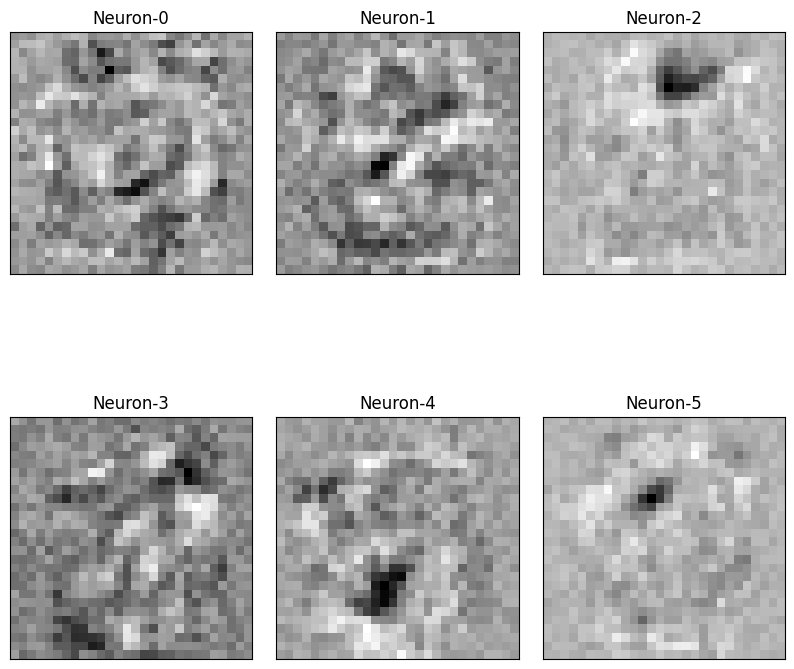

In [64]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [6]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr=Autoencoder1.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr[0])

#print('\nEvaluation of model on validation data:')
valErr=Autoencoder1.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr=Autoencoder1.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr[0])


Average reconstruction Loss :
11385/11385 [==============================] - 11s 955us/step - loss: 0.0030 - accuracy: 0.3650
Train Data: 0.003040848532691598
3795/3795 [==============================] - 3s 853us/step - loss: 0.0042 - accuracy: 0.3545
Validation Data: 0.004246460739523172
3795/3795 [==============================] - 3s 859us/step - loss: 0.0044 - accuracy: 0.3568
Test Data: 0.0043895915150642395


356/356 [==============================] - 1s 1ms/step


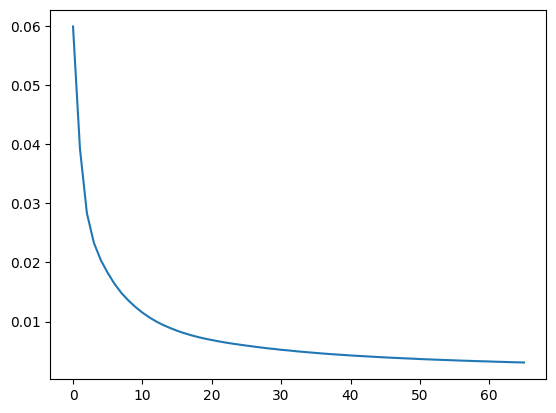

In [7]:
'''visualization-Task2-d'''
trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
plt.plot(ae1history.history['loss'])

In [59]:
trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
testReconstruct=Autoencoder1.predict(Input_test_Dataset)
valReconstruct=Autoencoder1.predict(Input_val_Dataset)

119/119 [==============================] - 0s 3ms/step


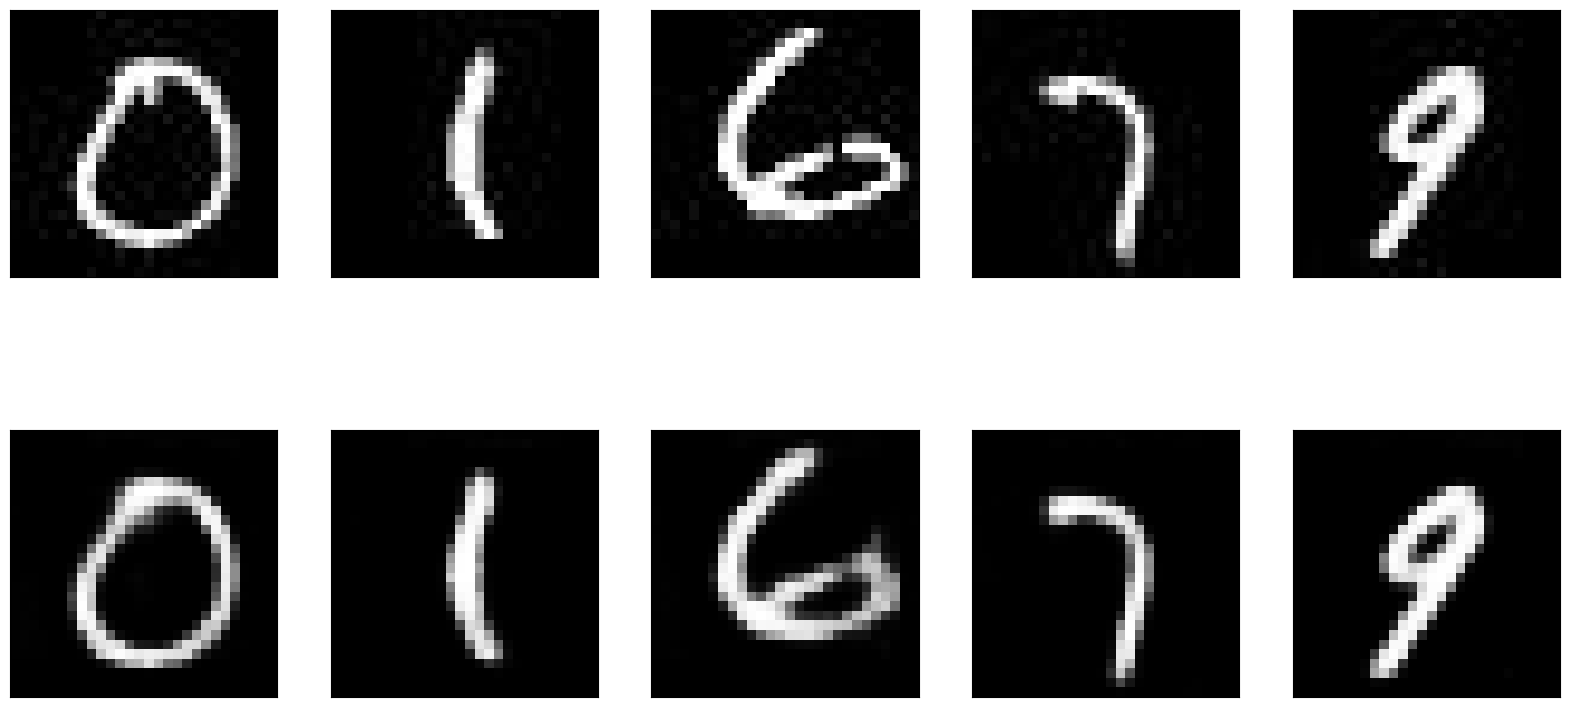

In [60]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


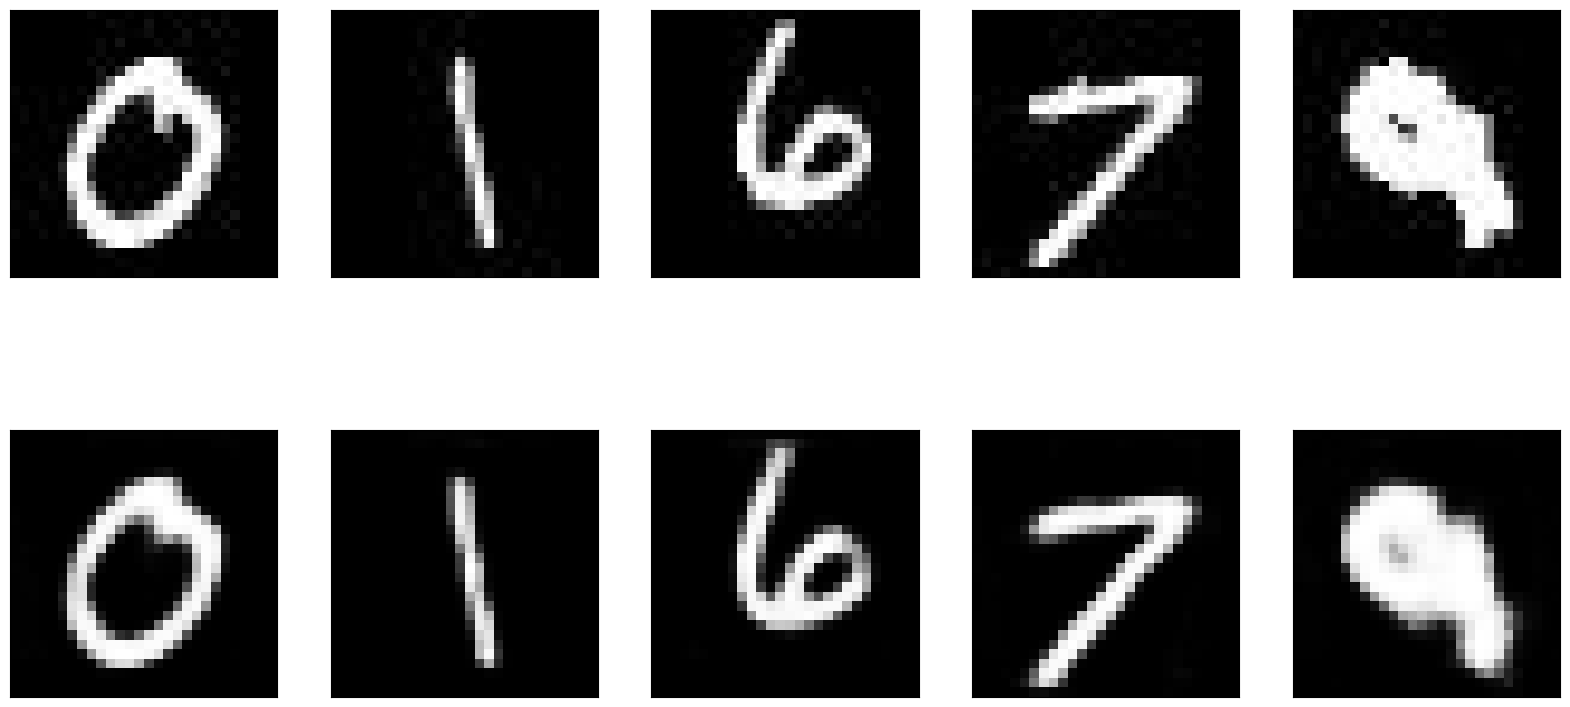

In [61]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

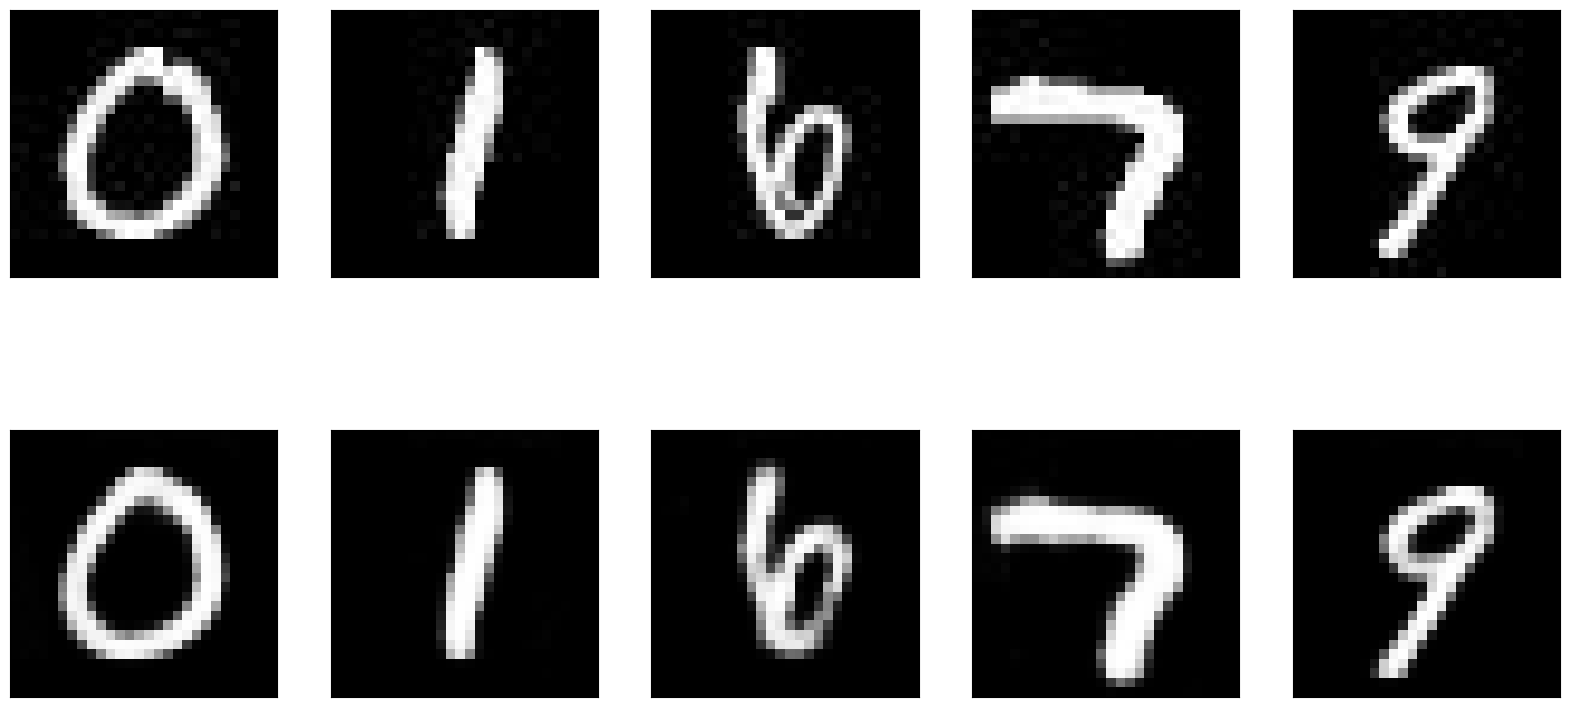

In [62]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

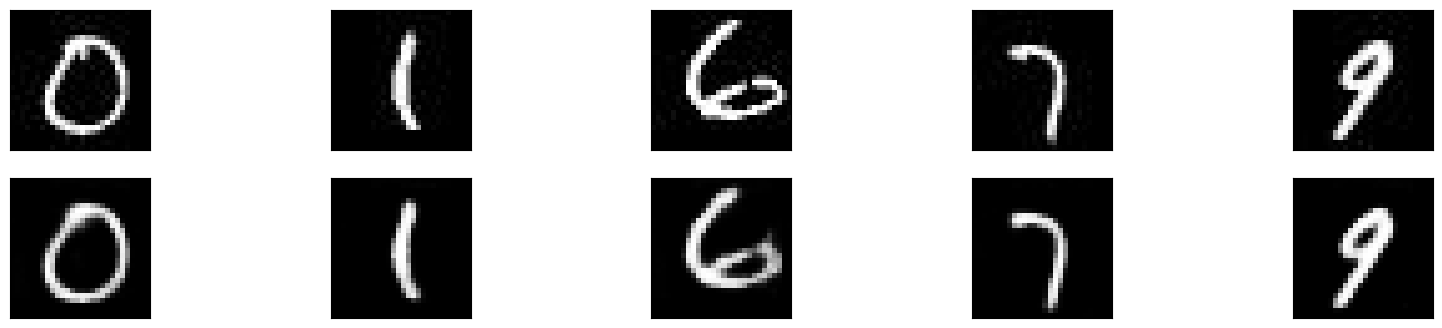

In [8]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


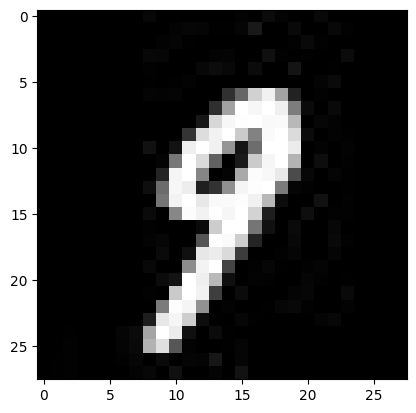

In [9]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

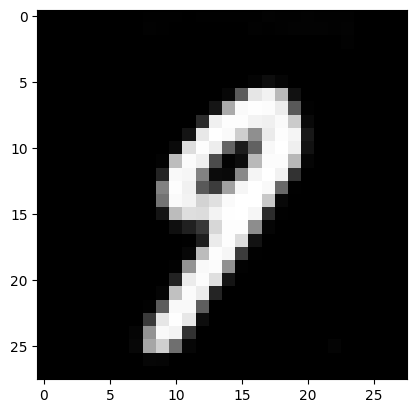

In [10]:
plt.imshow(trainReconstruct[0].reshape(28,28),cmap='gray')

In [11]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode=Encoder1.predict(Input_train_Dataset)
valEncode=Encoder1.predict(Input_val_Dataset)
testEncode=Encoder1.predict(Input_test_Dataset)

'''Fcnn'''
model = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(512, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(128, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit = model.fit(x = trainEncode, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode,  Output_val), validation_batch_size=1)

model.save('/Users/vds/Downloads/modelAssign4/ae256.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae256.pckl','wb')
p.dump(model_fit.history,f)
f.close()




119/119 [==============================] - 0s 918us/step
Epoch 1/10000
356/356 [==============================] - 5s 11ms/step - loss: 0.4501 - accuracy: 0.8401 - val_loss: 0.1185 - val_accuracy: 0.9618
Epoch 2/10000
356/356 [==============================] - 3s 10ms/step - loss: 0.1155 - accuracy: 0.9620 - val_loss: 0.1151 - val_accuracy: 0.9628
Epoch 3/10000
356/356 [==============================] - 4s 11ms/step - loss: 0.0997 - accuracy: 0.9661 - val_loss: 0.0987 - val_accuracy: 0.9665
Epoch 4/10000
356/356 [==============================] - 4s 11ms/step - loss: 0.0839 - accuracy: 0.9725 - val_loss: 0.0818 - val_accuracy: 0.9715
Epoch 5/10000
356/356 [==============================] - 4s 12ms/step - loss: 0.0762 - accuracy: 0.9751 - val_loss: 0.0828 - val_accuracy: 0.9713
Epoch 6/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.0676 - accuracy: 0.9761 - val_loss: 0.0690 - val_accuracy: 0.9773
Epoch 7/10000
356/356 [==============================] - 3s 10ms/ste

In [12]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainEncode,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valEncode, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testEncode, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testEncode, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=tf.math.confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 755us/step - loss: 0.0152 - accuracy: 0.9947
['loss', 'accuracy']
[0.01520132552832365, 0.9947299361228943]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 746us/step - loss: 0.0750 - accuracy: 0.9821
['loss', 'accuracy']
[0.07502727955579758, 0.9820817112922668]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 751us/step - loss: 0.0775 - accuracy: 0.9829
['loss', 'accuracy']
[0.07754073292016983, 0.9828721880912781]

Predictions for test data:
3795/3795 [==============================] - 3s 667us/step
[4 4 4 ... 1 1 1]
tf.Tensor(
[[755   0   0   2   2]
 [  1 749   0   5   4]
 [ 24   1 731   1   2]
 [  2   1   0 751   5]
 [  5   1   0   9 744]], shape=(5, 5), dtype=int32)


In [13]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [14]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val

In [15]:
#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim2=128

In [16]:
#Autoencoder Arch-1
xInp2=Input(shape=(28,28),name="img")
inp2=Flatten(input_shape=(28, 28), name='InputLayer')(xInp2)

hl1a2=Dense(400,activation='sigmoid')(inp2)

encodedOut2=Dense(encodingDim2,activation='sigmoid')(hl1a2)

Encoder2=Model(xInp2,encodedOut2,name='encoder')

hl3a2=Dense(400,activation='sigmoid')(encodedOut2)

decodedOut2=Dense(784,activation='sigmoid')(hl3a2)
out2=Reshape((28,28))(decodedOut2)
optimizer2=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder2=Model(xInp2,out2,name='AutoencoderA1')
Autoencoder2.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder2.compile(optimizer2, loss='mse',metrics=['accuracy'])
ae2history=Autoencoder2.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 400)               314000    
                                                                 
 dense_5 (Dense)             (None, 128)               51328     
                                                                 
 dense_6 (Dense)             (None, 400)               51600     
                                                                 
 dense_7 (Dense)             (None, 784)               314384    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)          

356/356 [==============================] - 3s 8ms/step - loss: 0.0044 - accuracy: 0.3574 - val_loss: 0.0053 - val_accuracy: 0.3519
Epoch 49/1000
356/356 [==============================] - 3s 7ms/step - loss: 0.0043 - accuracy: 0.3580 - val_loss: 0.0053 - val_accuracy: 0.3514
Epoch 50/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0043 - accuracy: 0.3588 - val_loss: 0.0051 - val_accuracy: 0.3517
Epoch 51/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0042 - accuracy: 0.3597 - val_loss: 0.0052 - val_accuracy: 0.3531
Epoch 52/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0042 - accuracy: 0.3590 - val_loss: 0.0051 - val_accuracy: 0.3510
Epoch 53/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0041 - accuracy: 0.3589 - val_loss: 0.0050 - val_accuracy: 0.3529
Epoch 54/1000
356/356 [==============================] - 3s 8ms/step - loss: 0.0040 - accuracy: 0.3593 - val_loss: 0.0050 - val_accuracy: 0.3525

In [17]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr2=Autoencoder2.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr2[0])

#print('\nEvaluation of model on validation data:')
valErr2=Autoencoder2.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr2[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr2=Autoencoder2.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr2[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 810us/step - loss: 0.0032 - accuracy: 0.3684
Train Data: 0.0031948916148394346
3795/3795 [==============================] - 3s 811us/step - loss: 0.0044 - accuracy: 0.3588
Validation Data: 0.004399556666612625
3795/3795 [==============================] - 3s 795us/step - loss: 0.0045 - accuracy: 0.3579
Test Data: 0.004549429286271334


356/356 [==============================] - 1s 1ms/step


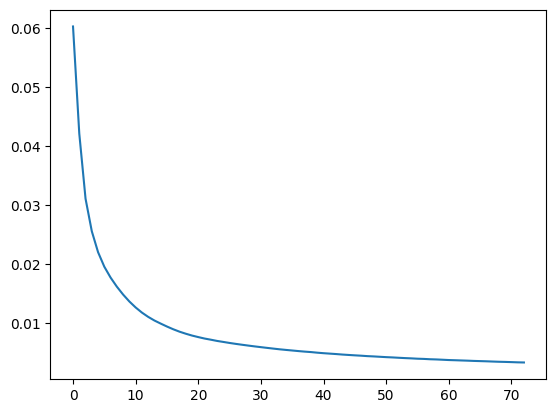

In [18]:
'''visualization-Task2-d'''
trainReconstruct2=Autoencoder2.predict(Input_train_Dataset)
plt.plot(ae2history.history['loss'])

In [47]:
'''visualization-Task2-d'''
trainReconstruct2=Autoencoder2.predict(Input_train_Dataset)
testReconstruct2=Autoencoder2.predict(Input_test_Dataset)
valReconstruct2=Autoencoder2.predict(Input_val_Dataset)

119/119 [==============================] - 0s 2ms/step


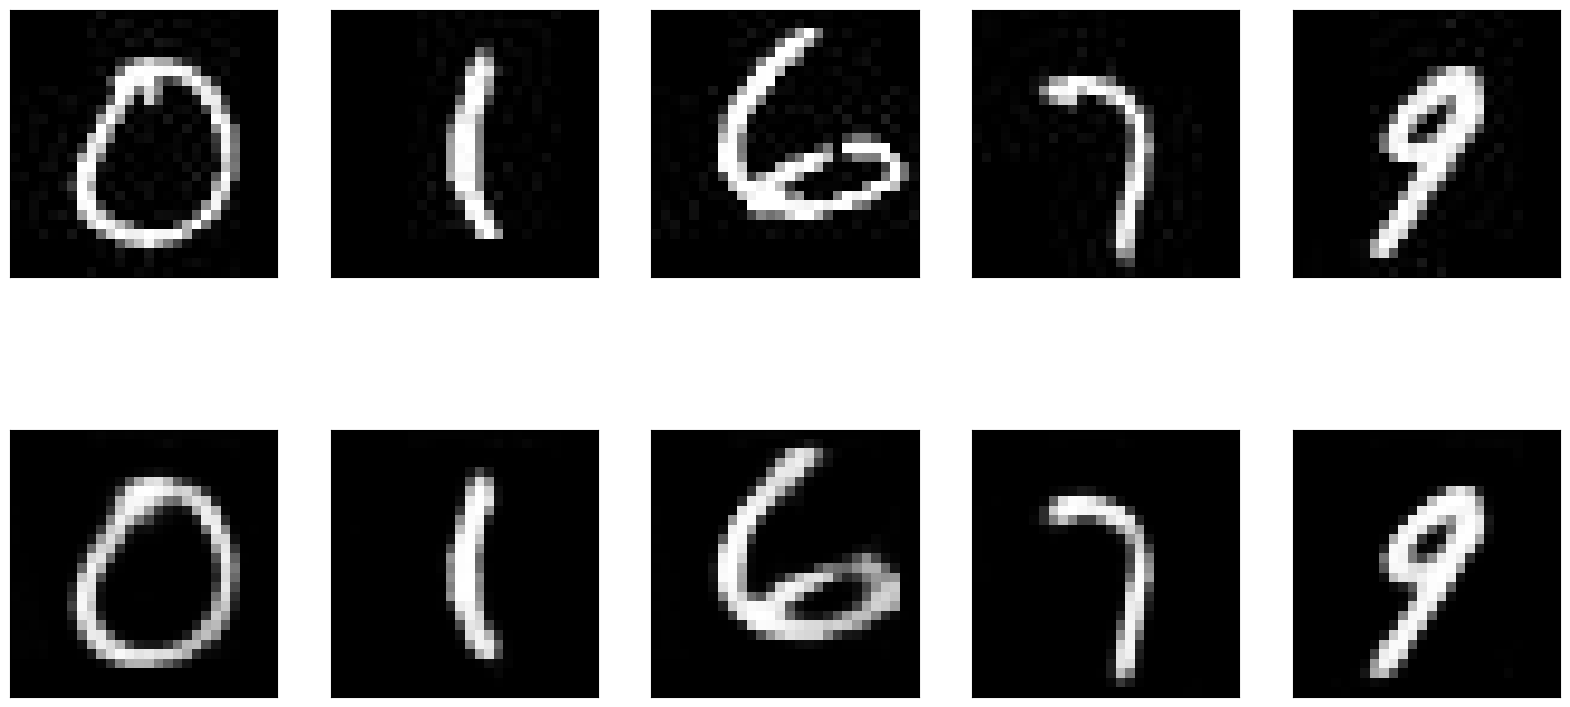

In [48]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

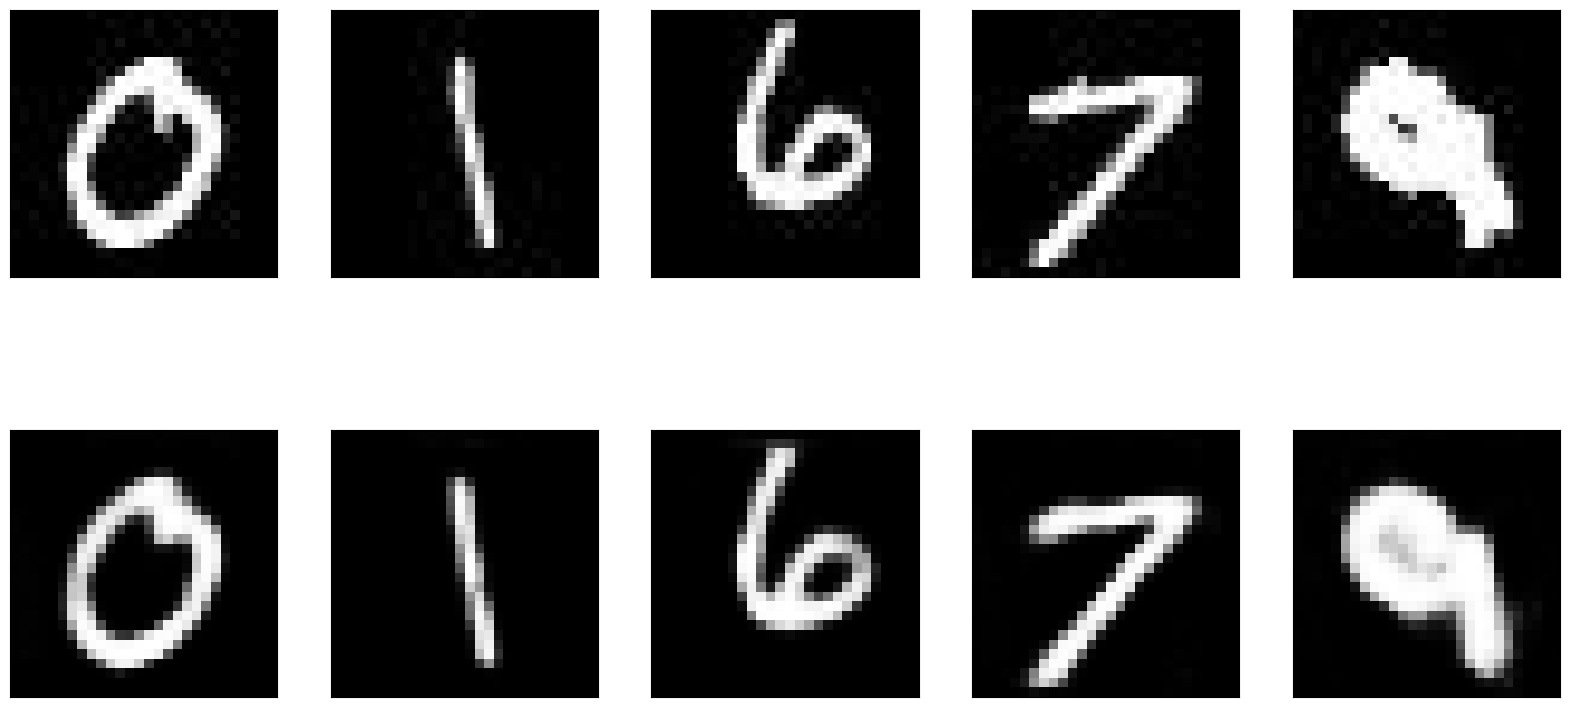

In [49]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

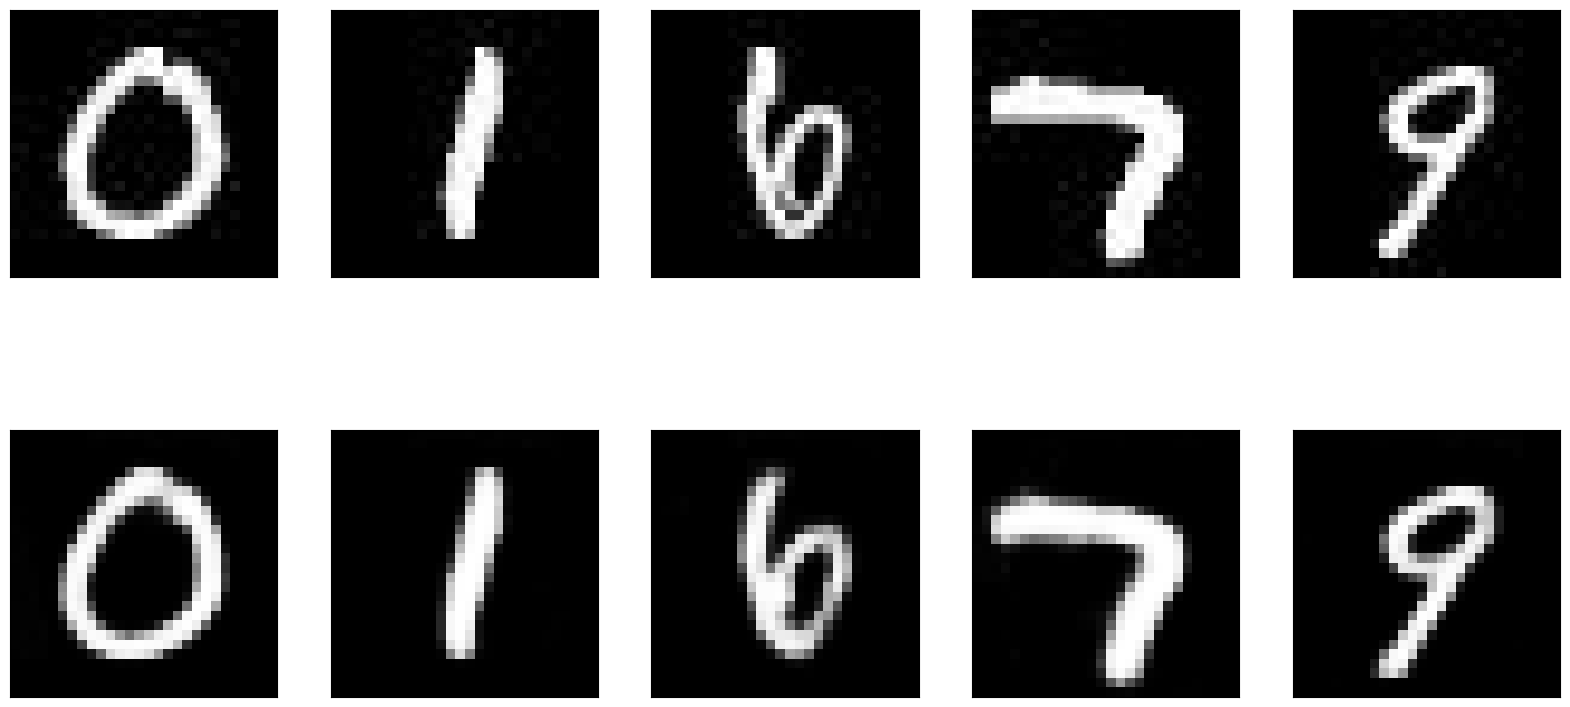

In [50]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

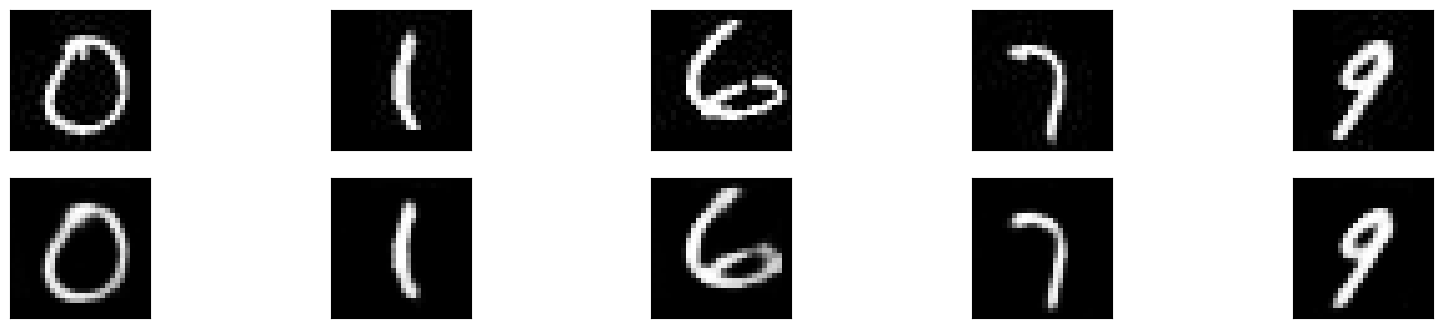

In [19]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [20]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode2=Encoder2.predict(Input_train_Dataset)
valEncode2=Encoder2.predict(Input_val_Dataset)
testEncode2=Encoder2.predict(Input_test_Dataset)

#Fcnn
model2 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(512, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(128, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit2 = model2.fit(x = trainEncode2, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode2,  Output_val), validation_batch_size=1)

model2.save('/Users/vds/Downloads/modelAssign4/ae128.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae128.pckl','wb')
p.dump(model_fit2.history,f)
f.close()

119/119 [==============================] - 0s 837us/step
Epoch 1/10000
356/356 [==============================] - 4s 9ms/step - loss: 0.5618 - accuracy: 0.7960 - val_loss: 0.1616 - val_accuracy: 0.9447
Epoch 2/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1365 - accuracy: 0.9548 - val_loss: 0.1340 - val_accuracy: 0.9563
Epoch 3/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1208 - accuracy: 0.9614 - val_loss: 0.1086 - val_accuracy: 0.9639
Epoch 4/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1101 - accuracy: 0.9633 - val_loss: 0.1039 - val_accuracy: 0.9650
Epoch 5/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1034 - accuracy: 0.9668 - val_loss: 0.0969 - val_accuracy: 0.9657
Epoch 6/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.0942 - accuracy: 0.9700 - val_loss: 0.0900 - val_accuracy: 0.9673
Epoch 7/10000
356/356 [==============================] - 3s 9ms/step - lo

In [21]:
trainEncode2.shape

(11385, 128)

In [22]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc2=model2.evaluate(x=trainEncode2,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(trainAcc2)

print('\nEvaluation of model on validation data:')
valAcc2=model2.evaluate(x=valEncode2, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(valAcc2)

print('\nEvaluation of model on test data:')
testAcc2=model2.evaluate(x=testEncode2, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(testAcc2)

print('\nPredictions for test data:')
testProb2=model2.predict(testEncode2, batch_size=1, verbose="auto", callbacks=None)
pred2=np.argmax(testProb2,axis=1)
print(pred2)


Evaluation of model on train data:
11385/11385 [==============================] - 8s 739us/step - loss: 0.0119 - accuracy: 0.9966
['loss', 'accuracy']
[0.011873377487063408, 0.9965744614601135]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 738us/step - loss: 0.0525 - accuracy: 0.9850
['loss', 'accuracy']
[0.052467890083789825, 0.9849802255630493]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 752us/step - loss: 0.0544 - accuracy: 0.9866
['loss', 'accuracy']
[0.054435845464468, 0.9865612387657166]

Predictions for test data:
3795/3795 [==============================] - 2s 635us/step
[4 4 4 ... 1 1 1]


In [23]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix2=tf.math.confusion_matrix(Output_test,pred2)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix2)

tf.Tensor(
[[748   0   3   3   5]
 [  1 754   1   3   0]
 [  4   0 754   0   1]
 [  0   4   0 745  10]
 [  2   2   0  12 743]], shape=(5, 5), dtype=int32)


In [24]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [25]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

In [26]:
#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim3=64

In [27]:
#Autoencoder Arch-1
xInp3=Input(shape=(28,28),name="img")
inp3=Flatten(input_shape=(28, 28), name='InputLayer')(xInp3)

hl1a3=Dense(400,activation='sigmoid')(inp3)

encodedOut3=Dense(encodingDim3,activation='sigmoid')(hl1a3)

Encoder3=Model(xInp3,encodedOut3,name='encoder')

hl3a3=Dense(400,activation='sigmoid')(encodedOut3)

decodedOut3=Dense(784,activation='sigmoid')(hl3a3)

#decodedOut3=Dense(784,activation='sigmoid')(encodedOut3)
out3=Reshape((28,28))(decodedOut3)
optimizer3=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder3=Model(xInp3,out3,name='AutoencoderA1')
Autoencoder3.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder3.compile(optimizer3, loss='mse',metrics=['accuracy'])
ae3history=Autoencoder3.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 400)               314000    
                                                                 
 dense_9 (Dense)             (None, 64)                25664     
                                                                 
 dense_10 (Dense)            (None, 400)               26000     
                                                                 
 dense_11 (Dense)            (None, 784)               314384    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)          

356/356 [==============================] - 2s 7ms/step - loss: 0.0051 - accuracy: 0.3523 - val_loss: 0.0059 - val_accuracy: 0.3450
Epoch 49/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0050 - accuracy: 0.3524 - val_loss: 0.0059 - val_accuracy: 0.3466
Epoch 50/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0050 - accuracy: 0.3526 - val_loss: 0.0058 - val_accuracy: 0.3474
Epoch 51/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0049 - accuracy: 0.3536 - val_loss: 0.0058 - val_accuracy: 0.3449
Epoch 52/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0048 - accuracy: 0.3538 - val_loss: 0.0057 - val_accuracy: 0.3493
Epoch 53/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0048 - accuracy: 0.3535 - val_loss: 0.0057 - val_accuracy: 0.3497
Epoch 54/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0047 - accuracy: 0.3534 - val_loss: 0.0056 - val_accuracy: 0.3460

In [28]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr3=Autoencoder3.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr3[0])

#print('\nEvaluation of model on validation data:')
valErr3=Autoencoder3.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr3[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr3=Autoencoder3.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr3[0])


Average reconstruction Loss :
11385/11385 [==============================] - 10s 860us/step - loss: 0.0037 - accuracy: 0.3589
Train Data: 0.0037353280931711197
3795/3795 [==============================] - 3s 856us/step - loss: 0.0049 - accuracy: 0.3514
Validation Data: 0.0048995791003108025
3795/3795 [==============================] - 3s 854us/step - loss: 0.0051 - accuracy: 0.3525
Test Data: 0.005106042139232159


356/356 [==============================] - 1s 1ms/step


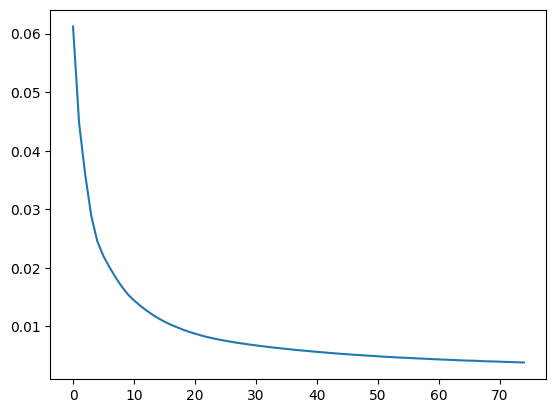

In [29]:
'''visualization-Task2-d'''
trainReconstruct3=Autoencoder3.predict(Input_train_Dataset)
plt.plot(ae3history.history['loss'])

In [51]:
'''visualization-Task2-d'''
trainReconstruct3=Autoencoder3.predict(Input_train_Dataset)
valReconstruct3=Autoencoder3.predict(Input_val_Dataset)
testReconstruct3=Autoencoder3.predict(Input_test_Dataset)

119/119 [==============================] - 0s 2ms/step


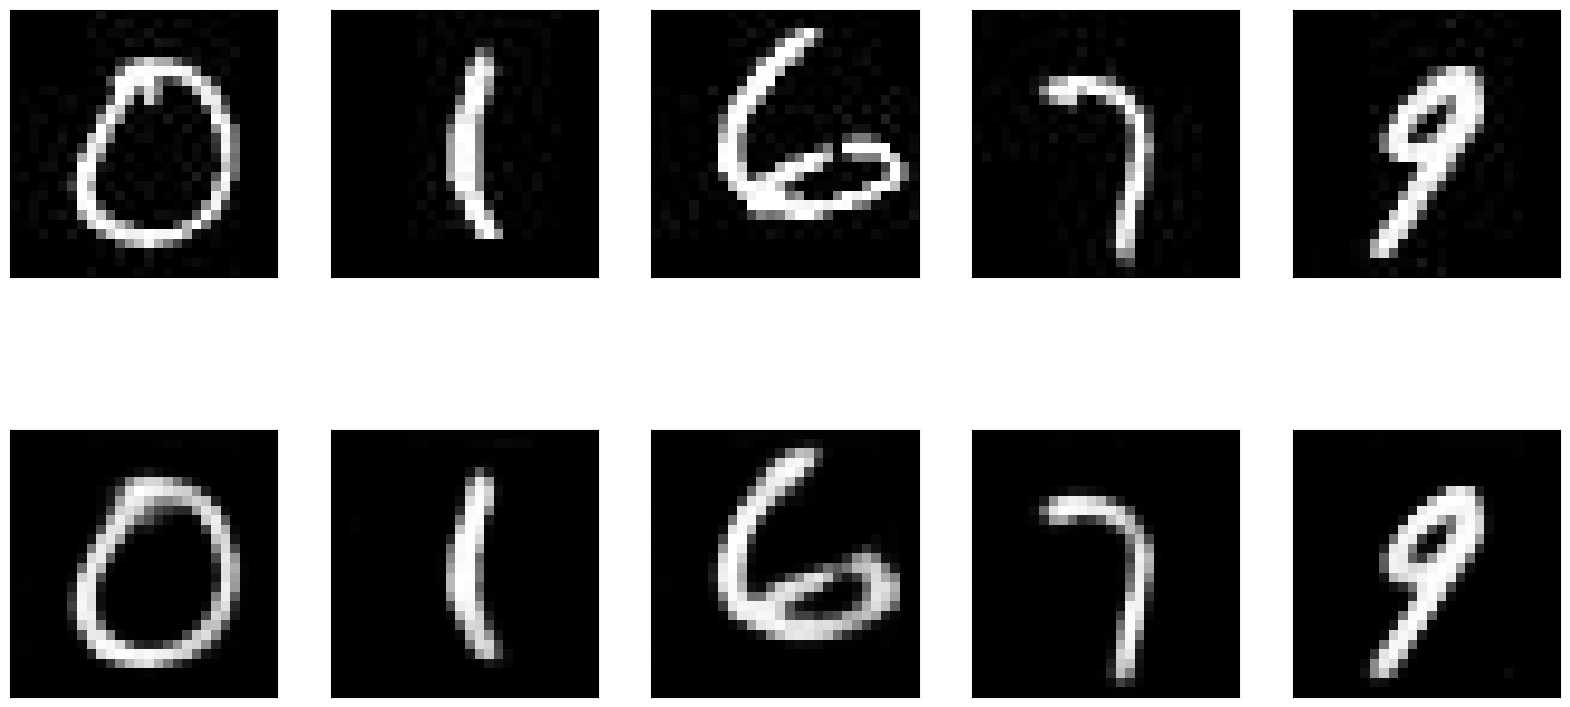

In [52]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

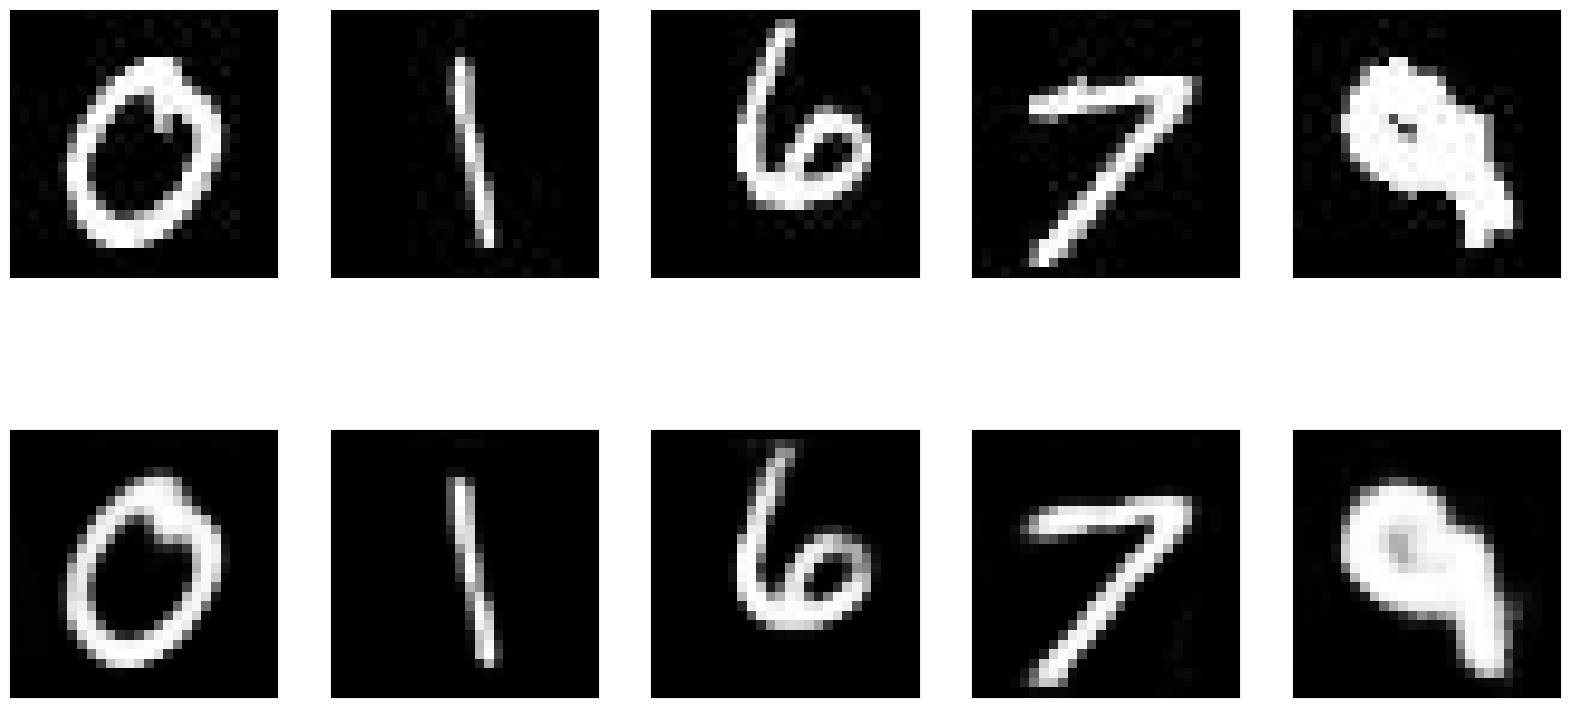

In [53]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

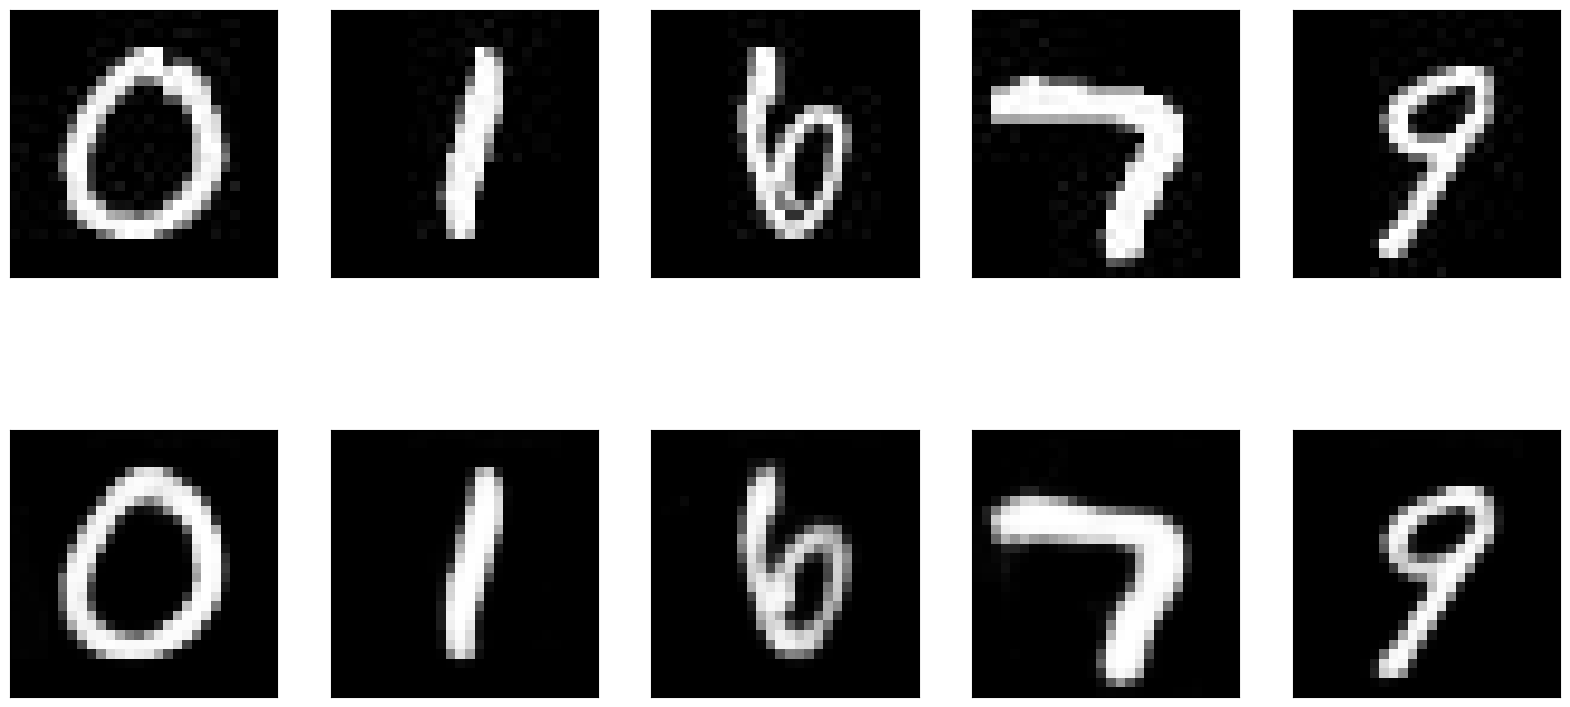

In [54]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

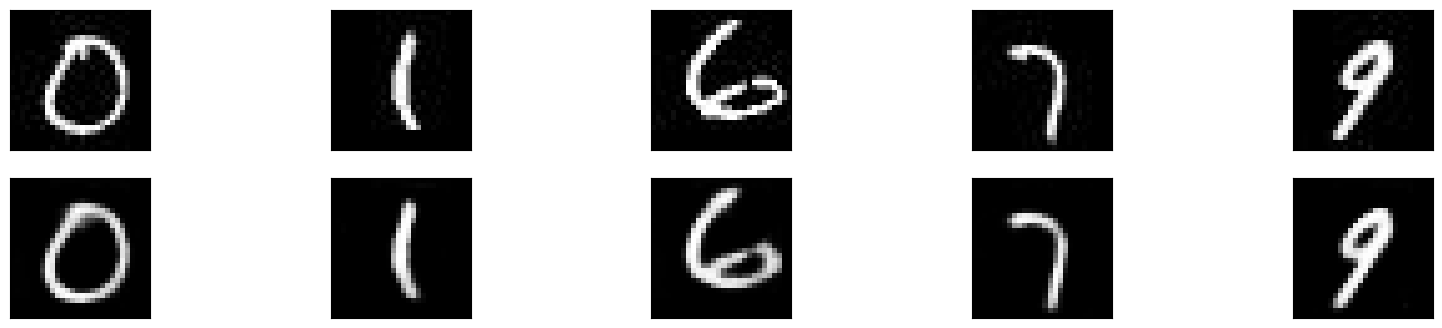

In [30]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

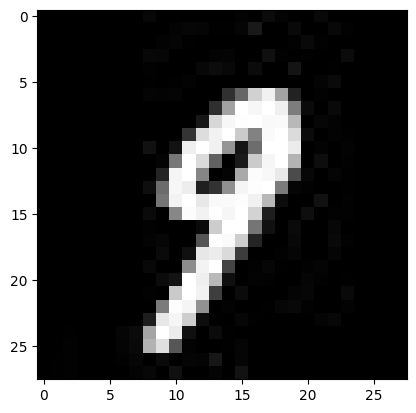

In [31]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

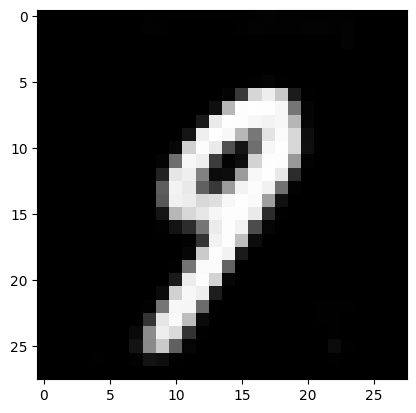

In [32]:
plt.imshow(trainReconstruct3[0].reshape(28,28),cmap='gray')

In [33]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode3=Encoder3.predict(Input_train_Dataset)
valEncode3=Encoder3.predict(Input_val_Dataset)
testEncode3=Encoder3.predict(Input_test_Dataset)

#Fcnn'''
model3 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(512, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(128, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model3.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit3 = model3.fit(x = trainEncode3, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode3,  Output_val), validation_batch_size=1)

model3.save('/Users/vds/Downloads/modelAssign4/ae64.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae64.pckl','wb')
p.dump(model_fit3.history,f)
f.close()

119/119 [==============================] - 0s 894us/step
Epoch 1/10000
356/356 [==============================] - 4s 9ms/step - loss: 0.8239 - accuracy: 0.6723 - val_loss: 0.2275 - val_accuracy: 0.9333
Epoch 2/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1792 - accuracy: 0.9398 - val_loss: 0.1632 - val_accuracy: 0.9478
Epoch 3/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1517 - accuracy: 0.9495 - val_loss: 0.1460 - val_accuracy: 0.9526
Epoch 4/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1396 - accuracy: 0.9538 - val_loss: 0.1323 - val_accuracy: 0.9586
Epoch 5/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1326 - accuracy: 0.9583 - val_loss: 0.1196 - val_accuracy: 0.9589
Epoch 6/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1208 - accuracy: 0.9587 - val_loss: 0.1142 - val_accuracy: 0.9615
Epoch 7/10000
356/356 [==============================] - 3s 9ms/step - lo

Epoch 56/10000
356/356 [==============================] - 4s 10ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0603 - val_accuracy: 0.9831
Epoch 57/10000
356/356 [==============================] - 8s 22ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0677 - val_accuracy: 0.9781
Epoch 58/10000
356/356 [==============================] - 4s 12ms/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 0.0756 - val_accuracy: 0.9792
Epoch 59/10000
356/356 [==============================] - 4s 12ms/step - loss: 0.0220 - accuracy: 0.9924 - val_loss: 0.0635 - val_accuracy: 0.9813
Epoch 60/10000
356/356 [==============================] - 8s 21ms/step - loss: 0.0224 - accuracy: 0.9918 - val_loss: 0.0584 - val_accuracy: 0.9823
Epoch 61/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0601 - val_accuracy: 0.9821
Epoch 62/10000
356/356 [==============================] - 4s 11ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0

In [34]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc3=model3.evaluate(x=trainEncode3,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(trainAcc3)

print('\nEvaluation of model on validation data:')
valAcc3=model3.evaluate(x=valEncode3, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(valAcc3)

print('\nEvaluation of model on test data:')
testAcc3=model3.evaluate(x=testEncode3, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(testAcc3)

print('\nPredictions for test data:')
testProb3=model3.predict(testEncode3, batch_size=1, verbose="auto", callbacks=None)
pred3=np.argmax(testProb3,axis=1)
print(pred3)


Evaluation of model on train data:
11385/11385 [==============================] - 12s 1ms/step - loss: 0.0089 - accuracy: 0.9969
['loss', 'accuracy']
[0.008900164626538754, 0.9969257712364197]

Evaluation of model on validation data:
3795/3795 [==============================] - 5s 1ms/step - loss: 0.0660 - accuracy: 0.9842
['loss', 'accuracy']
[0.06595751643180847, 0.9841897487640381]

Evaluation of model on test data:
3795/3795 [==============================] - 5s 1ms/step - loss: 0.0738 - accuracy: 0.9831
['loss', 'accuracy']
[0.07379882782697678, 0.9831357002258301]

Predictions for test data:
3795/3795 [==============================] - 2s 620us/step
[4 4 4 ... 1 1 1]


In [35]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix3=tf.math.confusion_matrix(Output_test,pred3)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix3)

tf.Tensor(
[[746   0   4   4   5]
 [  1 749   0   6   3]
 [  6   1 751   0   1]
 [  2   2   1 740  14]
 [  5   2   0   7 745]], shape=(5, 5), dtype=int32)


In [36]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)

In [37]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim4=32

In [38]:
#Autoencoder Arch-1
xInp4=Input(shape=(28,28),name="img")
inp4=Flatten(input_shape=(28, 28), name='InputLayer')(xInp4)

hl1a4=Dense(400,activation='sigmoid')(inp4)

encodedOut4=Dense(encodingDim4,activation='sigmoid')(hl1a4)

Encoder4=Model(xInp4,encodedOut4,name='encoder')

hl3a4=Dense(400,activation='sigmoid')(encodedOut4)

decodedOut4=Dense(784,activation='sigmoid')(hl3a4)

#encodedOut4=Dense(encodingDim3,activation='sigmoid')(inp4)

#Encoder4=Model(xInp4,encodedOut4,name='encoder')


#decodedOut4=Dense(784,activation='sigmoid')(encodedOut4)
out4=Reshape((28,28))(decodedOut4)
optimizer4=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder4=Model(xInp4,out4,name='AutoencoderA1')
Autoencoder4.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder4.compile(optimizer4, loss='mse',metrics=['accuracy'])
ae4history=Autoencoder4.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dense_13 (Dense)            (None, 32)                12832     
                                                                 
 dense_14 (Dense)            (None, 400)               13200     
                                                                 
 dense_15 (Dense)            (None, 784)               314384    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)          

356/356 [==============================] - 2s 7ms/step - loss: 0.0065 - accuracy: 0.3439 - val_loss: 0.0071 - val_accuracy: 0.3389
Epoch 49/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0064 - accuracy: 0.3447 - val_loss: 0.0071 - val_accuracy: 0.3371
Epoch 50/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0063 - accuracy: 0.3453 - val_loss: 0.0071 - val_accuracy: 0.3396
Epoch 51/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0062 - accuracy: 0.3453 - val_loss: 0.0069 - val_accuracy: 0.3395
Epoch 52/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0062 - accuracy: 0.3464 - val_loss: 0.0069 - val_accuracy: 0.3418
Epoch 53/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0061 - accuracy: 0.3463 - val_loss: 0.0069 - val_accuracy: 0.3414
Epoch 54/1000
356/356 [==============================] - 2s 7ms/step - loss: 0.0060 - accuracy: 0.3473 - val_loss: 0.0068 - val_accuracy: 0.3410

In [39]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr4=Autoencoder4.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr4[0])

#print('\nEvaluation of model on validation data:')
valErr4=Autoencoder4.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr4[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr4=Autoencoder4.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr4[0])


Average reconstruction Loss :
11385/11385 [==============================] - 10s 857us/step - loss: 0.0046 - accuracy: 0.3520
Train Data: 0.0046022804453969
3795/3795 [==============================] - 3s 854us/step - loss: 0.0058 - accuracy: 0.3445
Validation Data: 0.005806940142065287
3795/3795 [==============================] - 3s 849us/step - loss: 0.0061 - accuracy: 0.3470
Test Data: 0.006075239274650812


356/356 [==============================] - 1s 1ms/step


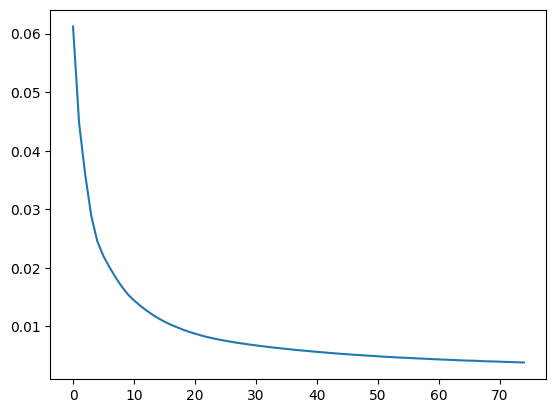

In [40]:
'''visualization-Task2-d'''
trainReconstruct4=Autoencoder4.predict(Input_train_Dataset)
plt.plot(ae3history.history['loss'])

In [55]:
'''visualization-Task2-d'''
trainReconstruct4=Autoencoder4.predict(Input_train_Dataset)
valReconstruct4=Autoencoder4.predict(Input_val_Dataset)
testReconstruct4=Autoencoder4.predict(Input_test_Dataset)

119/119 [==============================] - 0s 1ms/step


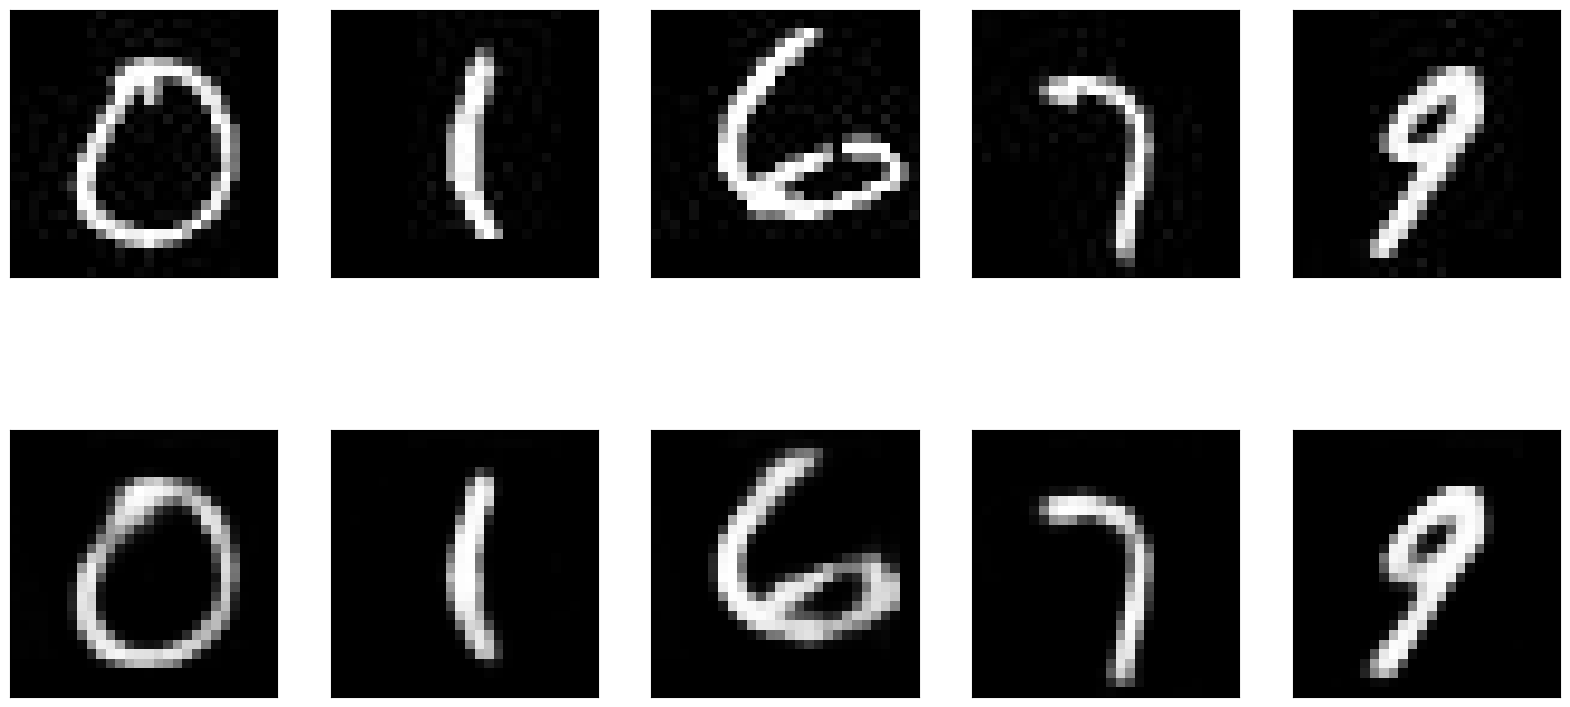

In [56]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

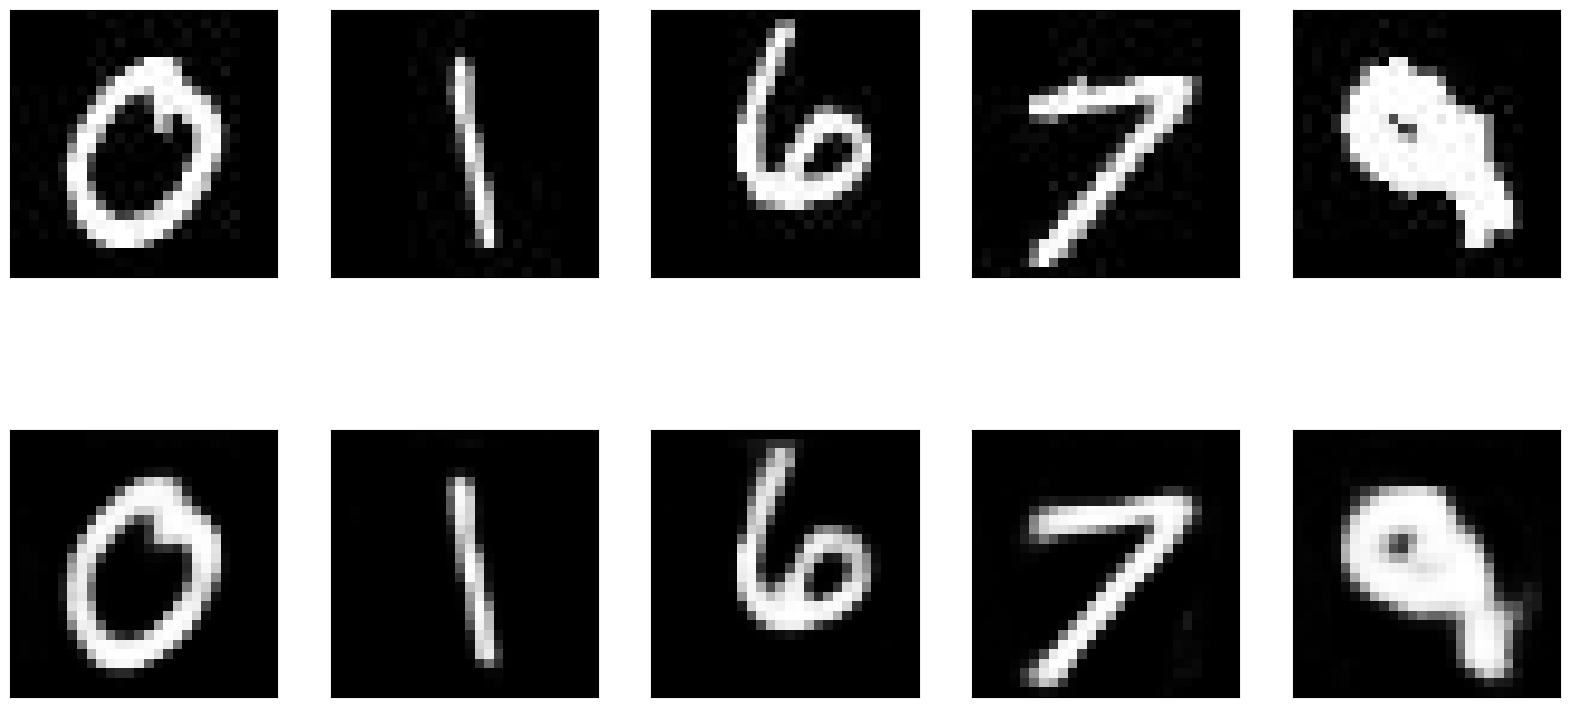

In [57]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

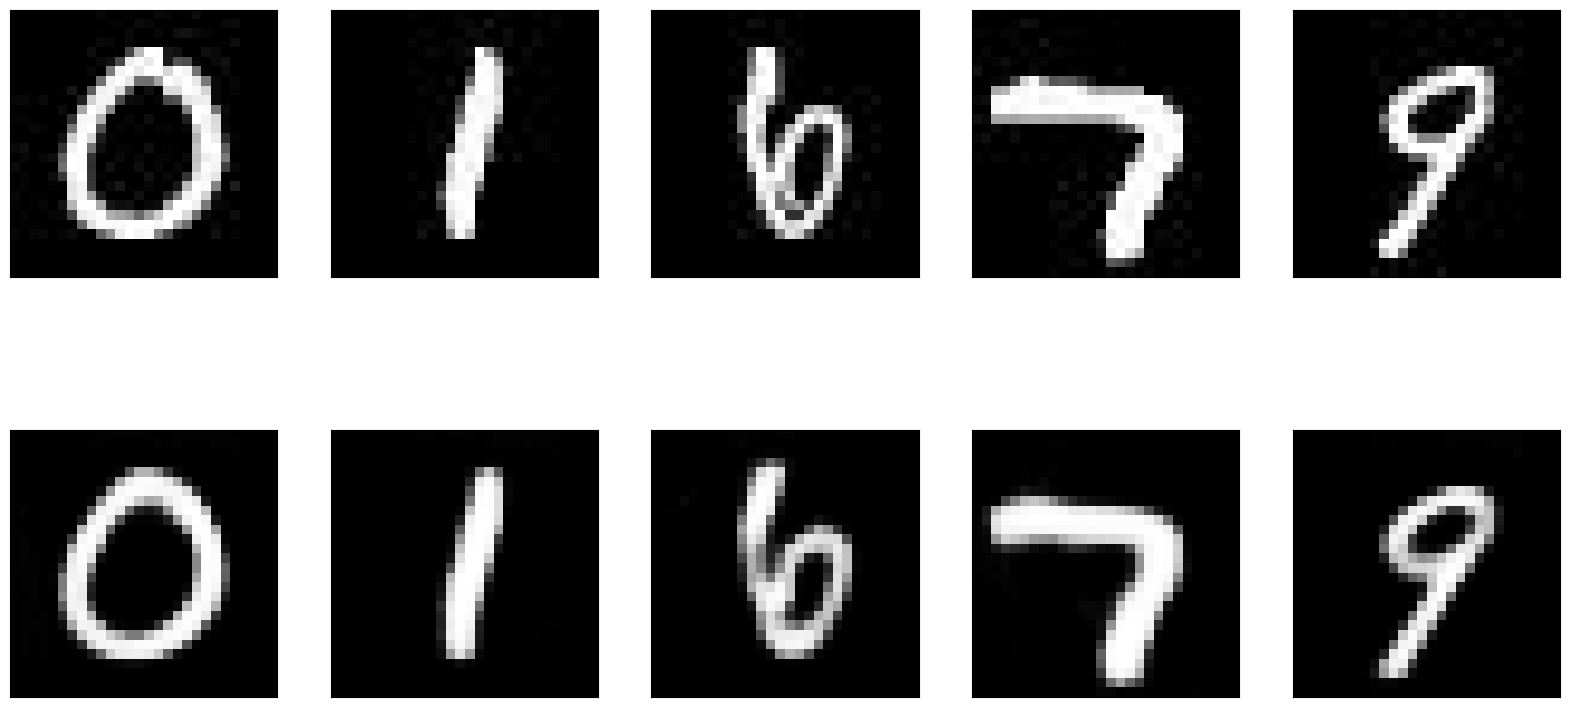

In [58]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

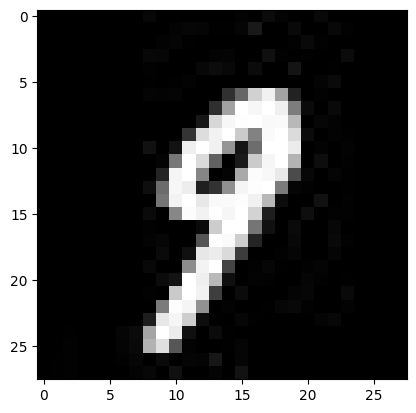

In [42]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

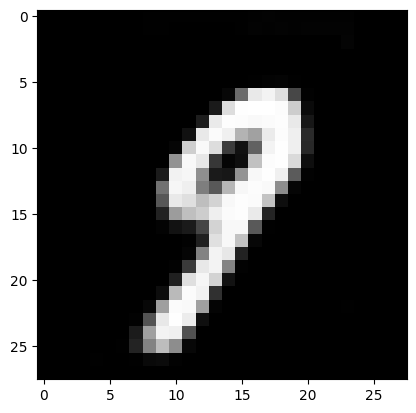

In [43]:
plt.imshow(trainReconstruct4[0].reshape(28,28),cmap='gray')

In [44]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode4=Encoder4.predict(Input_train_Dataset)
valEncode4=Encoder4.predict(Input_val_Dataset)
testEncode4=Encoder4.predict(Input_test_Dataset)

'''Fcnn'''
model4 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(512, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(128, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model4.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit4 = model4.fit(x = trainEncode4, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode4,  Output_val), validation_batch_size=1)

model4.save('/Users/vds/Downloads/modelAssign4/ae32.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae32.pckl','wb')
p.dump(model_fit4.history,f)
f.close()

119/119 [==============================] - 0s 865us/step
Epoch 1/10000
356/356 [==============================] - 4s 9ms/step - loss: 0.9953 - accuracy: 0.5879 - val_loss: 0.2897 - val_accuracy: 0.9086
Epoch 2/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.2194 - accuracy: 0.9265 - val_loss: 0.2118 - val_accuracy: 0.9302
Epoch 3/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1737 - accuracy: 0.9397 - val_loss: 0.1604 - val_accuracy: 0.9460
Epoch 4/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1570 - accuracy: 0.9455 - val_loss: 0.1736 - val_accuracy: 0.9415
Epoch 5/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1468 - accuracy: 0.9460 - val_loss: 0.1395 - val_accuracy: 0.9536
Epoch 6/10000
356/356 [==============================] - 3s 9ms/step - loss: 0.1378 - accuracy: 0.9519 - val_loss: 0.1364 - val_accuracy: 0.9531
Epoch 7/10000
356/356 [==============================] - 3s 9ms/step - lo

In [45]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc4=model4.evaluate(x=trainEncode4,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(trainAcc4)

print('\nEvaluation of model on validation data:')
valAcc4=model4.evaluate(x=valEncode4, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(valAcc4)

print('\nEvaluation of model on test data:')
testAcc4=model4.evaluate(x=testEncode4, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(testAcc4)

print('\nPredictions for test data:')
testProb4=model4.predict(testEncode4, batch_size=1, verbose="auto", callbacks=None)
pred4=np.argmax(testProb4,axis=1)
print(pred4)


Evaluation of model on train data:
11385/11385 [==============================] - 8s 744us/step - loss: 0.0845 - accuracy: 0.9718
['loss', 'accuracy']
[0.08452168107032776, 0.9718050360679626]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 734us/step - loss: 0.1021 - accuracy: 0.9679
['loss', 'accuracy']
[0.1021236851811409, 0.9678524136543274]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 731us/step - loss: 0.0978 - accuracy: 0.9668
['loss', 'accuracy']
[0.09783273935317993, 0.9667984247207642]

Predictions for test data:
3795/3795 [==============================] - 2s 635us/step
[4 4 4 ... 1 1 1]


In [46]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix4=tf.math.confusion_matrix(Output_test,pred4)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix4)

tf.Tensor(
[[751   0   5   2   1]
 [  3 748   1   5   2]
 [ 10   3 742   3   1]
 [  4   4   4 732  15]
 [ 14   6   1  42 696]], shape=(5, 5), dtype=int32)
